# Create tables

In [1]:
# import statements
import pandas as pd
import json
import os
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import table 

In [2]:
columns = {"accuracy":"Accuracy", "precision":"Precision", "recall":"Recall", "F1":"F1"}

In [3]:
# Exp name
exp_name = "exp3_len2"

In [4]:
def get_df(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    df = pd.DataFrame.from_dict(data["final"]).T
    df = df.rename(columns=columns)
    return df

In [5]:
dfs = list()
for i in range(1, 5):
    filename = "{}_ver{}.json".format(exp_name, i)
    dfs.append(get_df(os.path.join("results", filename)))
    print(dfs[i-1])

                    Accuracy  Precision    Recall        F1
TF_IDF_LR           0.488458   0.603297  0.584897  0.467516
TF_IDF_svc_sigmoid  0.592130   0.596398  0.669545  0.546173
TF_IDF_svc_rbf      0.545770   0.597742  0.683640  0.535241
TF_IDF_svc_linear   0.578231   0.591397  0.676491  0.542960
TF_IDF_NN           0.601980   0.581810  0.608555  0.522068
BERT_LR             0.598131   0.579376  0.693121  0.562269
BERT_svc_sigmoid    0.562268   0.531692  0.939556  0.606907
BERT_svc_rbf        0.596167   0.551124  0.831725  0.590629
BERT_svc_linear     0.536606   0.556801  0.656769  0.528646
BERT_NN             0.586614   0.532521  0.637056  0.520064
                    Accuracy  Precision    Recall        F1
TF_IDF_LR           0.518238   0.680817  0.562892  0.492781
TF_IDF_svc_sigmoid  0.609414   0.684711  0.649261  0.576541
TF_IDF_svc_rbf      0.571158   0.689169  0.652021  0.565214
TF_IDF_svc_linear   0.614984   0.682199  0.655585  0.581982
TF_IDF_NN           0.607078   0.667868 

In [6]:
df_concat = pd.concat(dfs)

In [7]:
by_row_index = df_concat.groupby(df_concat.index)

In [8]:
df_means = by_row_index.mean()

In [9]:
df_var = by_row_index.var()

In [10]:
df_var

,Accuracy,Precision,Recall,F1
BERT_LR,0.000512,0.000797,0.002407,0.000796
BERT_NN,0.000388,0.001899,0.000788,0.000664
BERT_svc_linear,0.003306,0.001530,0.002680,0.002446
BERT_svc_rbf,0.002162,0.000428,0.002736,0.002200
BERT_svc_sigmoid,0.001834,0.000509,0.000658,0.000313
TF_IDF_LR,0.003360,0.001088,0.000258,0.001149
TF_IDF_NN,0.000715,0.001339,0.000464,0.000619
TF_IDF_svc_linear,0.003099,0.001616,0.000160,0.001042
TF_IDF_svc_rbf,0.002879,0.001468,0.000335,0.000963
TF_IDF_svc_sigmoid,0.002669,0.001400,0.000102,0.000751


In [12]:
df_means

,Accuracy,Precision,Recall,F1
BERT_LR,0.568876,0.587337,0.649239,0.537790
BERT_NN,0.579086,0.581826,0.640178,0.533204
BERT_svc_linear,0.532769,0.574442,0.607776,0.505805
BERT_svc_rbf,0.566694,0.563418,0.833768,0.592123
BERT_svc_sigmoid,0.561986,0.546838,0.919567,0.615136
TF_IDF_LR,0.469293,0.639618,0.564845,0.459827
TF_IDF_NN,0.615084,0.631802,0.636141,0.552978
TF_IDF_svc_linear,0.576258,0.641422,0.661301,0.550479
TF_IDF_svc_rbf,0.534411,0.645316,0.664175,0.538154
TF_IDF_svc_sigmoid,0.576950,0.641843,0.654631,0.546978


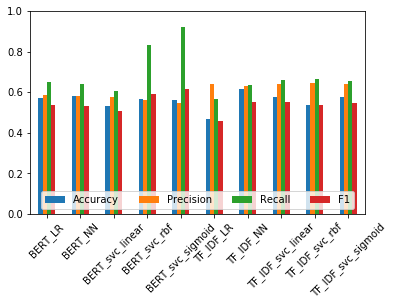

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, num="seaborn-dark")
ax = df_means.plot(kind="bar", ax=ax, legend=False, ylim=(0,1))

# add legend
ax.legend(loc='lower center', ncol=4)

# add labels
g = plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 )

# shift subplots upward
box = ax.get_position()
ax.set_position([box.x0, box.y0+.1, box.width, box.height-.05])

# save
fig.savefig(os.path.join("results", "{}_bargraph.png".format(exp_name)))

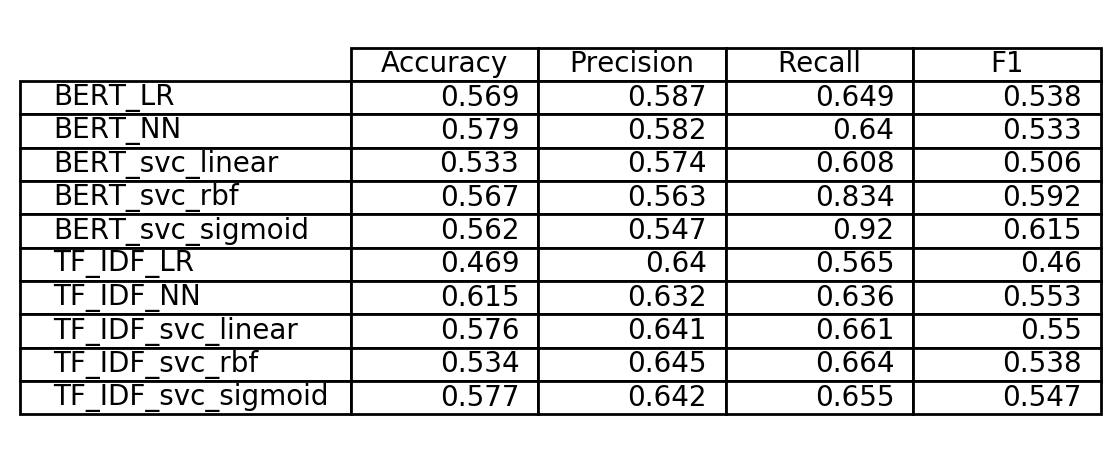

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, num="seaborn-dark", frameon=True, figsize=[6, 2], dpi=200)# no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.axis('off')

# shift subplots upward
box = ax.get_position()
ax.set_position([box.x0+.15, box.y0-.12, box.width-.15, box.height+.3])

table(ax, df_means.round(3),  loc = "center")
plt.savefig(os.path.join("results", "{}_table.png".format(exp_name)), pad_inches=1)